In [1]:
import warnings
warnings.filterwarnings('ignore')

# 현재 파일 디렉토리 확인하기
import os
os.getcwd()

'c:\\Users\\h2est\\Desktop\\practice'

In [2]:
# 압축된 데이터 파일 압축하기

from zipfile import ZipFile

file_dir = os.getcwd()
test_file_name = "train_job.zip"

with ZipFile(test_file_name, 'r') as zip_f:
    zip_f.printdir()
    # zip.extractall() 
    
    FileNames = zip_f.namelist()
    for fileName in FileNames:
        if fileName.endswith('.csv'):
            zip_f.extract(fileName, file_dir)
    
    print('Files are unzipped in this folder!')

File Name                                             Modified             Size
tags.csv                                       2019-12-02 09:05:08        39834
__MACOSX/                                      2019-12-02 09:07:36            0
__MACOSX/._tags.csv                            2019-12-02 09:05:08          659
job_companies.csv                              2019-11-30 05:54:28        52742
__MACOSX/._job_companies.csv                   2019-11-30 05:54:28         2094
job_tags.csv                                   2019-12-02 09:05:22       232970
__MACOSX/._job_tags.csv                        2019-12-02 09:05:22          652
train.csv                                      2019-11-30 06:15:52       408021
__MACOSX/._train.csv                           2019-11-30 06:15:52          267
user_tags.csv                                  2019-12-02 09:04:44      1152010
__MACOSX/._user_tags.csv                       2019-12-02 09:04:44          661
Files are unzipped in this folder!


# 데이터 읽고 준비하기

In [3]:
import pandas as pd
job_comp = pd.read_csv('./job_companies.csv')
job_comp.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [4]:
job_tags = pd.read_csv('./job_tags.csv')
job_tags.head()

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8


In [5]:
tags_df = pd.read_csv('./tags.csv')
tags_df.head()

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python


In [6]:
user_tags_df = pd.read_csv('./user_tags.csv')
user_tags_df.head()

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a


In [7]:
new_df = pd.merge(job_comp, job_tags, left_on='jobID', right_on='jobID')
new_df1 = pd.merge(tags_df, user_tags_df, left_on='tagID', right_on='tagID')
total_new_df = pd.merge(new_df, new_df1, left_on='tagID', right_on='tagID')
total_new_df = total_new_df.drop_duplicates()
total_new_df.head()

,companyID,jobID,companySize,tagID,keyword,userID
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN,3948ead63a9f2944218de038d8934305,Node.js,788ecdd13f033f8131eecd90ee59993e
1,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN,3948ead63a9f2944218de038d8934305,Node.js,fdfa9a38cf3d8d850a6fd47b438bfe43
2,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN,3948ead63a9f2944218de038d8934305,Node.js,461beab646d4e7e0fd168125f577483b
3,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN,3948ead63a9f2944218de038d8934305,Node.js,eeedf6d4d717eba333e1b53f1b5375c8
4,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN,3948ead63a9f2944218de038d8934305,Node.js,a35af76a1c0bb174a3cfc66592804848


In [8]:
total_new_df.isnull().sum()

companyID          0
jobID              0
companySize    14967
tagID              0
keyword            0
userID             0
dtype: int64

In [9]:
total_new_df.companySize.value_counts()

11-50       51459
51-100      27112
1-10        20315
201-500     10540
101-200     10327
1000 이상      4535
501-1000     2817
Name: companySize, dtype: int64

In [10]:
train_df = pd.read_csv('./train.csv')
train_df.head()

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [11]:
model_train_df = pd.merge(train_df, total_new_df, left_on= ['userID', 'jobID'], right_on=['userID', 'jobID'])
model_train_df.head()

,userID,jobID,applied,companyID,companySize,tagID,keyword
0,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,846c260d715e5b854ffad5f70a516c88,101-200,c8ba76c279269b1c6bc8a07e38e78fa4,MySQL
1,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,edfbe1afcf9246bb0d40eb4d8027d90f,NaN,aace49c7d80767cffec0e513ae886df0,Android
2,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,884d79963bd8bc0ae9b13a1aa71add73,11-50,0e095e054ee94774d6a496099eb1cf6a,JavaScript
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,884d79963bd8bc0ae9b13a1aa71add73,11-50,81dc9bdb52d04dc20036dbd8313ed055,ReactJS
4,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,884d79963bd8bc0ae9b13a1aa71add73,11-50,cd758e8f59dfdf06a852adad277986ca,TypeScript


In [12]:
test_df = pd.read_csv('./test_job.csv')
test_df.head()

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4


In [13]:
pd.read_csv('./test_job.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userID  2435 non-null   object
 1   jobID   2435 non-null   object
dtypes: object(2)
memory usage: 38.2+ KB


In [14]:
model_test_df = pd.merge(test_df, total_new_df, left_on= ['userID', 'jobID'], right_on=['userID', 'jobID'])
model_test_df.head()

,userID,jobID,companyID,companySize,tagID,keyword
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,b51a15f382ac914391a58850ab343b00,11-50,3948ead63a9f2944218de038d8934305,Node.js
1,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,b51a15f382ac914391a58850ab343b00,11-50,7d771e0e8f3633ab54856925ecdefc5d,HTML
2,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,b51a15f382ac914391a58850ab343b00,11-50,285ab9448d2751ee57ece7f762c39095,MongoDB
3,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,9f396fe44e7c05c16873b05ec425cbad,51-100,3948ead63a9f2944218de038d8934305,Node.js
4,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,68053af2923e00204c3ca7c6a3150cf7,11-50,0e095e054ee94774d6a496099eb1cf6a,JavaScript


In [15]:
model_train_df.isnull().sum() / len(model_train_df) * 100
# 결측치 날리기 -> 10% 밖에 안됨

userID          0.000000
jobID           0.000000
applied         0.000000
companyID       0.000000
companySize    10.153594
tagID           0.000000
keyword         0.000000
dtype: float64

In [16]:
model_test_df.isnull().sum() / len(model_test_df) * 100
# 결측치 날리기 -> 10% 밖에 안됨

userID         0.000000
jobID          0.000000
companyID      0.000000
companySize    9.564967
tagID          0.000000
keyword        0.000000
dtype: float64

In [17]:
# 모델에 필요한 데이터 최종 정리
model_train_df.dropna(axis=0, inplace=True)

# model_train_df.fillna(method='pad',axis=0, inplace=True)
model_train_df.isnull().sum() / len(model_train_df) * 100

userID         0.0
jobID          0.0
applied        0.0
companyID      0.0
companySize    0.0
tagID          0.0
keyword        0.0
dtype: float64

In [18]:
model_test_df.dropna(axis=0, inplace=True)
# model_test_df.fillna(method='pad',axis=0, inplace=True)
model_test_df.isnull().sum() / len(model_test_df) * 100

userID         0.0
jobID          0.0
companyID      0.0
companySize    0.0
tagID          0.0
keyword        0.0
dtype: float64

# 데이터 확인하기 - EDA

In [19]:
model_train_df.companySize.value_counts()

11-50       3245
51-100      1413
1-10        1187
101-200      708
201-500      670
1000 이상      370
501-1000      70
Name: companySize, dtype: int64

In [20]:
model_train_df.keyword.value_counts()

JavaScript                   1292
Java                         1065
Node.js                       743
MySQL                         699
Python                        568
                             ... 
Spring Data JPA                 1
Microservice Architecture       1
Jest                            1
GatsbyJS                        1
Redux-Saga                      1
Name: keyword, Length: 103, dtype: int64

In [21]:
model_train_df.groupby(by=['userID'])['keyword'].count()

userID
0004289ee1c7b8b08c77e19878106ae3     43
00dd1479a58930a357e7b4e2ab4c9f33     42
015b469419f616144c13e0194f880af7      4
01ed443356f762e9132b58f8c80e131d     51
03c60b7fc8519077914166ebcfbd6a34      5
                                   ... 
f98e712b83a95b07ef771150ecee9cd4     17
fa2a28ade168508972790316e314d47e     33
fd1b4044581c63b9cb16d91958302072     30
fdfa9a38cf3d8d850a6fd47b438bfe43    145
fe292163d06253b716e9a0099b42031d     24
Name: keyword, Length: 193, dtype: int64

In [22]:
model_train_df.groupby(by=['tagID'])['userID'].count()

tagID
03f544613917945245041ea1581df0c2       1
0c048b3a434e49e655c1247efb389cec       3
0c8ce55163055c4da50a81e0a273468c       2
0e095e054ee94774d6a496099eb1cf6a    1292
16e6a3326dd7d868cbc926602a61e4d0       8
                                    ... 
fc3cf452d3da8402bebb765225ce8c0e       1
fc528592c3858f90196fbfacc814f235       1
fe2d010308a6b3799a3d9c728ee74244       1
fec87a37cdeec1c6ecf8181c0aa2d3bf       1
ffeed84c7cb1ae7bf4ec4bd78275bb98      16
Name: userID, Length: 103, dtype: int64

In [23]:
model_train_df.groupby(by=['keyword'])['userID'].count()

keyword
ASP.NET                  1
AWS DynamoDB             3
AWS EC2                 48
AWS ElasticBeanstalk     2
AWS Lambda               9
                        ..
Vuex                     1
Webpack                 27
iOS                      2
jQuery                  81
web3.js                  1
Name: userID, Length: 103, dtype: int64

In [24]:
model_train_df.groupby(by=['keyword'])['companySize'].count()

keyword
ASP.NET                  1
AWS DynamoDB             3
AWS EC2                 48
AWS ElasticBeanstalk     2
AWS Lambda               9
                        ..
Vuex                     1
Webpack                 27
iOS                      2
jQuery                  81
web3.js                  1
Name: companySize, Length: 103, dtype: int64

In [25]:
model_train_df.groupby(by=['keyword', 'companySize'])['userID'].count()

keyword       companySize
ASP.NET       11-50           1
AWS DynamoDB  11-50           2
              51-100          1
AWS EC2       1-10           12
              101-200         7
                             ..
jQuery        101-200         5
              11-50          50
              201-500         7
              51-100          8
web3.js       1-10            1
Name: userID, Length: 311, dtype: int64

In [26]:
model_train_df.drop(columns=['tagID'], axis=1, inplace=True)

In [27]:
model_train_df.columns

Index(['userID', 'jobID', 'applied', 'companyID', 'companySize', 'keyword'], dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in model_train_df.columns:
    if col != 'applied':
        model_train_df[col] = le.fit_transform(model_train_df[col])
model_train_df.head()

,userID,jobID,applied,companyID,companySize,keyword
0,62,186,0,120,2,61
2,187,136,0,124,3,47
3,187,136,0,124,3,79
4,187,136,0,124,3,94
5,156,92,0,163,6,47


In [29]:
model_train_df.applied.value_counts()
# 데이터의 불균형이 보여짐 -> 불균형 처리가 필요함.

0    6344
1    1319
Name: applied, dtype: int64

In [30]:
model_test_df.drop(columns=['tagID'], axis=1, inplace=True)
for col in model_test_df.columns:
    if col != 'applied':
        model_test_df[col] = le.fit_transform(model_test_df[col])
model_test_df.head()

,userID,jobID,companyID,companySize,keyword
0,176,89,139,3,50
1,176,89,139,3,34
2,176,89,139,3,46
3,118,248,118,6,50
4,29,149,79,3,39


# 모델링 준비하기

In [31]:
model_train_df.reset_index(drop=True, inplace=True)
model_train_df.head()

,userID,jobID,applied,companyID,companySize,keyword
0,62,186,0,120,2,61
1,187,136,0,124,3,47
2,187,136,0,124,3,79
3,187,136,0,124,3,94
4,156,92,0,163,6,47


In [32]:
# 데이터 분할하기

cols = [col for col in model_train_df.columns if col != 'applied']
X_data = model_train_df[cols]
y_data = model_train_df['applied']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2022)
over_X_tr, over_y_tr = sm.fit_resample(X_data,y_data)
X_tr, X_val, y_tr, y_val = train_test_split(over_X_tr, over_y_tr, test_size=0.2, random_state=2022, shuffle=True)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((10150, 5), (2538, 5), (10150,), (2538,))

In [33]:
over_y_tr.value_counts()

0    6344
1    6344
Name: applied, dtype: int64

# binary classifier 모델 선택하기
- RF classifier
- XGBoost, LightGBM classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBClassifier
from lightgbm import LGBMClassifier

rfc = RandomForestClassifier(random_state=2022)
xgbc = XGBClassifier(random_state=2022)
lgbc = LGBMClassifier(random_state=2022)

In [35]:
rfc.fit(X_tr, y_tr)
preds_rfc = rfc.predict(X_val)
print('score of rfc for validation data:', rfc.score(X_val, y_val))

score of rfc for validation data: 0.9062253743104807


In [36]:
xgbc.fit(X_tr, y_tr)
preds_xgbc = xgbc.predict(X_val)
print('score of xgbc for validation data:', xgbc.score(X_val, y_val))

[00:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of xgbc for validation data: 0.905043341213554


In [37]:
lgbc.fit(X_tr, y_tr)
preds_lgbc = lgbc.predict(X_val)
print('score of lgbc for validation data:', lgbc.score(X_val, y_val))

score of lgbc for validation data: 0.8707643814026793


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=2022)
gbc.fit(X_tr, y_tr)
preds_gbc = gbc.predict(X_val)
print('score of lgbc for validation data:', gbc.score(X_val, y_val))

score of lgbc for validation data: 0.7663514578408196


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('accuracy score (rfc):', accuracy_score(y_val, preds_rfc))
print('accuracy score (xgbc):', accuracy_score(y_val, preds_xgbc))
print('accuracy score (lgbc):', accuracy_score(y_val, preds_lgbc))
print('accuracy score (gbc):', accuracy_score(y_val, preds_gbc))

accuracy score (rfc): 0.9062253743104807
accuracy score (xgbc): 0.905043341213554
accuracy score (lgbc): 0.8707643814026793
accuracy score (gbc): 0.7663514578408196


In [40]:
print('confusion_matrix (rfc):', '\n', confusion_matrix(y_val, preds_rfc))
print('confusion_matrix (xgbc):', '\n', confusion_matrix(y_val, preds_xgbc))
print('confusion_matrix (lgbc):', '\n', confusion_matrix(y_val, preds_lgbc))
print('confusion_matrix (gbc):', '\n', confusion_matrix(y_val, preds_gbc))

confusion_matrix (rfc): 
 [[1138  121]
 [ 117 1162]]
confusion_matrix (xgbc): 
 [[1139  120]
 [ 121 1158]]
confusion_matrix (lgbc): 
 [[1136  123]
 [ 205 1074]]
confusion_matrix (gbc): 
 [[1011  248]
 [ 345  934]]


In [41]:
print('classification_report (rfc):', '\n', classification_report(y_val, preds_rfc))
print('classification_report (xgbc):', '\n', classification_report(y_val, preds_xgbc))
print('classification_report (lgbc):', '\n', classification_report(y_val, preds_lgbc))
print('classification_report (gbc):', '\n', classification_report(y_val, preds_gbc))

classification_report (rfc): 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1259
           1       0.91      0.91      0.91      1279

    accuracy                           0.91      2538
   macro avg       0.91      0.91      0.91      2538
weighted avg       0.91      0.91      0.91      2538

classification_report (xgbc): 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1259
           1       0.91      0.91      0.91      1279

    accuracy                           0.91      2538
   macro avg       0.91      0.91      0.91      2538
weighted avg       0.91      0.91      0.91      2538

classification_report (lgbc): 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1259
           1       0.90      0.84      0.87      1279

    accuracy                           0.87      2538
   macro avg       0.87      0.87

In [42]:
# XGBoost, Random Forest 모델의 성능이 좋은 것으로 판단되어짐. (랜덤 포레스트의 성능이 다소 더 높은 편)

from sklearn.metrics import roc_auc_score, roc_curve

print('roc_auc_score (rfc):', roc_auc_score(y_val, preds_rfc))
print('roc_auc_score (xgbc):', roc_auc_score(y_val, preds_xgbc))
print('roc_auc_score (lgbc):', roc_auc_score(y_val, preds_lgbc))
print('roc_auc_score (gbc):', roc_auc_score(y_val, preds_gbc))

roc_auc_score (rfc): 0.9062071303968736
roc_auc_score (xgbc): 0.9050405493270967
roc_auc_score (lgbc): 0.8710109727553483
roc_auc_score (gbc): 0.7666381412702661


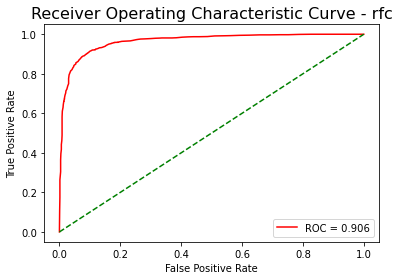

In [43]:
import matplotlib.pyplot as plt

def plot_roc_curve(fper, tper, model, preds):
    plt.plot(fper, tper, color='red', label='ROC = {:.3f}'.format(roc_auc_score(y_val, preds)))
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve - {model}', fontsize = 16)
    plt.legend()
    plt.show()

prob_rfc = rfc.predict_proba(X_val)
prob_rfc = prob_rfc[:, 1]
fper, tper, thresholds = roc_curve(y_val, prob_rfc)
plot_roc_curve(fper, tper, 'rfc', preds_rfc)


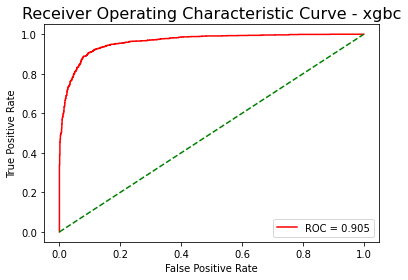

In [44]:
prob_xgbc = xgbc.predict_proba(X_val)
prob_xgbc = prob_xgbc[:, 1]
fper, tper, thresholds = roc_curve(y_val, prob_xgbc)
plot_roc_curve(fper, tper, 'xgbc', preds_xgbc)

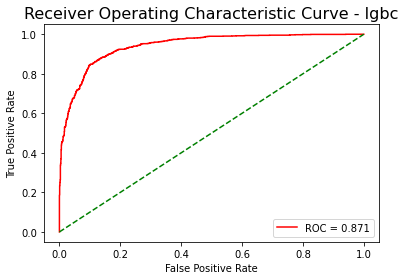

In [45]:
prob_lgbc = lgbc.predict_proba(X_val)
prob_lgbc = prob_lgbc[:, 1]
fper, tper, thresholds = roc_curve(y_val, prob_lgbc)
plot_roc_curve(fper, tper, 'lgbc', preds_lgbc)


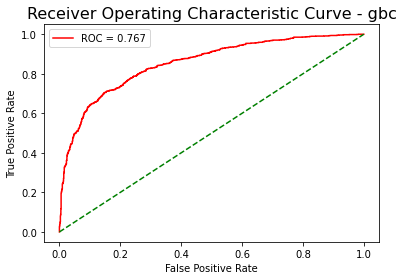

In [46]:
prob_gbc = gbc.predict_proba(X_val)
prob_gbc = prob_gbc[:, 1]
fper, tper, thresholds = roc_curve(y_val, prob_gbc)
plot_roc_curve(fper, tper, 'gbc', preds_gbc)

# 테스트 데이터에 대하여 예측하기 -- 랜덤 포레스트 모델 사용

In [47]:
preds_test = rfc.predict(model_test_df.drop_duplicates())
preds_test

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## 예측한 데이터 csv 형태 파일로 제출하기

In [48]:
pd.read_csv('./sample_output_job.csv').head()

,applied
0,0
1,1
2,0
3,1
4,0


In [49]:
submit_df = pd.DataFrame(preds_test, columns = ['applied'])
submit_df.head()

,applied
0,0
1,0
2,0
3,0
4,1


In [50]:
submit_df.iloc[:2435].to_csv('./ouput_data_for_submission.csv', index=False)

In [51]:
pd.read_csv('./ouput_data_for_submission.csv').head()

,applied
0,0
1,0
2,0
3,0
4,1


In [52]:
len(submit_df)

3139

In [53]:
len(model_test_df)

3139

In [54]:
df = pd.read_csv('./sample_output_job.csv')
len(df)

8

In [55]:
submit_df.iloc[:2435].value_counts()

applied
1          1239
0          1196
dtype: int64

In [56]:
submit_df.iloc[:2435].tail()

,applied
2430,0
2431,1
2432,1
2433,1
2434,0
